Evan Edelstein
EN.605.645.82.SP26

# Module 1 - Programming Assignment

## General Directions

1. You must follow the Programming Requirements outlined on Canvas.
2. The Notebook should be cleanly and fully executed before submission.
3. You should change the name of this file to be your JHED id. For example, `jsmith299.ipynb` although Canvas will change it to something else...
4. You must follow the Programming Requirments for this course.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>
        You should always read the entire assignment before beginning your work, so that you know in advance what the requested output will be and can plan your implementation accordingly.
    </p>
</div>

<div style="color: white; background: #C83F49; margin:20px; padding: 20px;">
    <strong>Academic Integrity and Copyright</strong>
    <p>You are not permitted to consult outside sources (Stackoverflow, YouTube, ChatGPT, etc.) or use "code assistance" (Co-Pilot, etc) to complete this assignment. By submitting this assignment for grading, you certify that the submission is 100% your own work, based on course materials, group interactions, instructor guidance. You agree to comply by the requirements set forth in the Syllabus, including, by reference, the JHU KSAS/WSE Graduate Academic Misconduct Policy.</p>
    <p>Sharing this assignment either directly (e.g., email, github, homework site) or indirectly (e.g., ChatGPT, machine learning platform) is a violation of the copyright. Additionally, all such sharing is a violation the Graduate Academic Misconduct Policy (facilitating academic dishonesty is itself academic dishonesty), even after you graduate.</p>
    <p>If you have questions or if you're unsure about the policy, ask via Canvas Inbox. In this case, being forgiven is <strong>not</strong> easier than getting permission and ignorance is not an excuse.</p>
    <p>This assignment is copyright (&copy Johns Hopkins University &amp; Stephyn G. W. Butcher). All rights reserved.</p>
</div>

## Classical Algorithms (and Data Structures)

In the spirit of "You Don't Need AI for That!", you're going to implement an autocomplete function two different ways this week.

The first version uses binary search.
The second version uses a Trie.

You should and must read the Programming Requirements on Canvas because in future assignments there are no guardrails or scaffolding.
However, because this is the first assignment of the semester, there is a lot more guardrails/scaffolding set up for the various parts.
We will provide *some* documentation (and instructions on how to complete it) and we will provide three (3) assertions.

In the future, you will have *some* pseudocode, assignment directions, and a goal but following the Programming Requirements will be on you.

## Autocomplete

We've all seen autocomplete.
You start to type a word, after the first 1, 2, 3 characters (normally at least 2), the program suggests completions for the word (hence the name!).
It can be basic (just suggest some words), smart (suggest words sorted by frequency), or super smart (suggest words based on previous words).

Autocomplete seems like it could require AI but it doesn't...at least not the basic or smart forms.
You're going to implement the basic form.

### Binary Search

The most naive approach would be to scan a dictionary of words.
That's going to be $O(n)$ in the dictionary.
That's not good.
Another way is to use a binary search.

With binary search, the program sees that we have typed "ca" and finds the position in a sorted list of words.
It then expands from that position to collect all the words that have that prefix ("ca").

Here is the pseudocode for both functions:

```
FUNCTION expand_from(words, mid, prefix):
    results ← []
    i ← mid
    WHILE i >= 0 AND words[i] starts with prefix:
        ADD words[i] TO results
        i ← i - 1
    j ← mid + 1
    WHILE j < length(words) AND words[j] starts with prefix:
        ADD words[j] TO results
        j ← j + 1
    RETURN results
```

```
FUNCTION binary_search_autocomplete(words, prefix):
    left ← 0
    right ← length(words) - 1
    results ← []

    WHILE left <= right:
        mid ← (left + right) // 2
        IF words[mid] starts with prefix:
            results ← expand_from(words, mid, prefix)
            BREAK
        ELSE IF words[mid] < prefix:
            left ← mid + 1
        ELSE:
            right ← mid - 1
    RETURN results
```

### Trie Based Search

Autocomplete lends itself to using a Trie.
In this case, look up is $O(m)$ where m is the length of the prefix.
We can implement a Trie in Python using Dicts.
As an example, suppose we want to store sequencies of numbers in Dicts as a Trie, what might that look like?
We have the number "112", "113", and "123".
After we have stored them in the Trie, we have:

```
{"1":
    {"1": {"2": "EOS",
           "3": "EOS"},
     "2": {"3": "EOS"}
    }
}
    
```

Looking up the numbers that start with "11" requires only 2 accesses.

The pseudocode for Trie Based Autocomplete is:

```
FUNCTION insert_trie(trie, word):
    IF word is empty:
        RETURN trie with END_OF_WORD flag set
    ELSE:
        first_char ← first character of word
        rest ← remaining characters
        IF first_char not in trie:
            trie[first_char] ← empty sub-trie
        trie[first_char] ← insert_trie(trie[first_char], rest)
        RETURN trie
```

```
FUNCTION search_prefix(trie, prefix):
    node ← trie
    FOR each char in prefix:
        IF char not in node:
            RETURN EMPTY
        node ← node[char]
    RETURN node
```

```
FUNCTION collect_words(node, prefix):
    results ← []
    IF node has END_OF_WORD flag:
        ADD prefix TO results
    FOR each (char, child) IN node:
        results ← results + collect_words(child, prefix + char)
    RETURN results
```

```
FUNCTION trie_autocomplete(trie, prefix):
    node ← search_prefix(trie, prefix)
    IF node is EMPTY:
        RETURN []
    RETURN collect_words(node, prefix)
```

## Binary Search Implementation

1. Review the Programming Requirements for the exact form and elements of the documentation. See the quicksort example for help on the Markdown.
2. Make sure the assertions pass.
3. Do not add any other code, functions, markdown cells, etc.
4. Python type annotations are **optional** but useful.

<a id="expand_from"></a>
## expand_from

`expand_from` given a list of sorted words, a prefix, and index into the list of a words that matches the prefix, collect all the words in the list that begin with a specific prefix by iterating to the right and left of the index into all matches are found. **Used by**: [binary_search_autocomplete](#binary_search_autocomplete)

* **words** list: sorted list of words. 
* **mid** int: index into the list of a word that matches the prefix
* **prefix** str: prefix to match 

**returns** list: matched words.

In [1]:
def expand_from(words: list[str], mid: int, prefix: str) -> list[str]:
    results: list[str] = []

    lower_index: int = mid  # expand to the left of mid
    while lower_index >= 0 and words[lower_index].startswith(prefix):
        results.append(words[lower_index])
        lower_index -= 1

    upper_index: int = mid + 1  # expand to the right of mid
    n_words: int = len(words)
    while upper_index < n_words and words[upper_index].startswith(prefix):
        results.append(words[upper_index])
        upper_index += 1

    return results

In [2]:
w = ["car", "cat", "dog"]
assert sorted(expand_from(w, 1, "ca")) == ["car", "cat"]
assert expand_from(w, 2, "dog") == ["dog"]
assert expand_from(w, 0, "z") == []

<a id="binary_search_autocomplete"></a>
## binary_search_autocomplete

`binary_search_autocomplete` given a sorted list of words, find all words that match a given prefix using binary-search. Each iteration of binary search bisects the list in half, if the bisection point is a match, [expand_form](#expand_form) is used to collect all the matching words, if not the algorithm continues searching the left half of the list if the word at the midpoint is less than the match or the right side if it is greater. Since each iteration halves the search space the runtime of this algorithm is O(logN), for N words to search. **Uses:** [expand_form](#expand_form)

* **words** list: sorted list of words
* **prefix** str: prefix to match 

**returns** list of matching words.

In [3]:
def binary_search_autocomplete(words: list[str], prefix: str) -> list[str]:
    results: list[str] = []

    left: int = 0
    right: int = len(words) - 1

    while left <= right:
        mid: int = (left + right) // 2 # floor div so always a valid index
        if words[mid].startswith(prefix):
            results = expand_from(words, mid, prefix)
            break
        elif words[mid] < prefix:
            left = mid + 1
        else:
            right = mid - 1

    return results

In [4]:
w = ["ant", "bat", "car", "cat", "dog"]
assert sorted(binary_search_autocomplete(w, "ca")) == ["car", "cat"]
assert binary_search_autocomplete(w, "dog") == ["dog"]
assert binary_search_autocomplete(w, "z") == []

## Trie Autocomplete Implementation

1. Review the Programming Requirements for the exact form and elements of the documentation. See the quicksort example for help on the Markdown.
2. Make sure the assertions pass.
3. Do not add any other code, functions, markdown cells, etc.
4. Python type annotations are **optional** but useful.

<a id="insert_trie"></a>
## insert_trie

`insert_trie` Insert a word into the dict-backed trie data structure. Each character of the word is added to the trie if it is not already present. The remaining characters are added by recursively calling insert_trie with them. After the last character is added an end-of-word sentinel '({END: True})' is placed. **Used for**: testing of [search_prefix](#search_prefix) and [collect_words](#collect_words)

* **trie** dict: trie data structure
* **word** str: word to add to trie

**returns** dict: modified trie with word added to it. 

In [5]:
END = "_end_"

In [6]:
def insert_trie(trie: dict, word: str) -> dict:
    if len(word) == 0: # End of Word
        trie.update({END: True})
        return trie
    
    first_char: str = word[0]
    remainder: str = word[1:] # can be empty string

    if first_char not in trie:
        trie[first_char] = {}

    trie[first_char] = insert_trie(trie[first_char], remainder)
    return trie

In [7]:
assert insert_trie({}, "cat") == {"c": {"a": {"t": {END: True}}}}
assert END in insert_trie({}, "")
assert "c" in insert_trie({}, "car")

<a id="search_prefix"></a>
## search_prefix

`search_prefix` Traverse through a trie to determine if it contains a prefix. If it does, return the subtrie at the prefix, if not return None. **Used by**: [trie_autocomplete](#trie_autocomplete)

* **trie** dict: trie data structure
* **prefix** str: prefix string to search for

**returns** dict | None: sub-trie containing prefix or None if prefix not in trie

In [8]:
def search_prefix(trie: dict, prefix: str) -> dict | None:
    node = trie
    
    for char in prefix:
        if char not in node:
            return None
        
        node = node[char]
    return node

In [9]:
t = insert_trie({}, "dog")
assert search_prefix(t, "do") == {"g": {END: True}}
assert search_prefix(t, "dog") == {END: True}
assert search_prefix(t, "cat") is None

<a id="collect_words"></a>
## collect_words

`collect_words` Collect complete words that start with a prefix from a set of words stored in a trie. The trie is recursively traversed to build the prefix string into complete words stored in the trie. Once the end-of-word sentinel is reached, the formed word is added to the result list. **Used by**: [trie_autocomplete](#trie_autocomplete)

* **node** dict: trie or subtree of a trie to collect words from
* **prefix** str: parent character (or characters if node is a sub-trie) of the trie

**returns** list: list of matching words

In [10]:
def collect_words(node: dict | None, prefix: str) -> list[str]:
    results: list[str] = []

    if node is None:
        raise ValueError("Trie dict is None")

    if node == {END: True}:
        results.append(prefix)
        return results  # not in pseudocode but makes sense as base case

    for char, child in node.items():
        results.extend(collect_words(child, prefix + char))  # prefix + char is the next key in the trie

    return results

In [11]:
t = {}
insert_trie(t, "cat")
insert_trie(t, "car")

assert sorted(collect_words(t, "")) == ["car", "cat"]
assert collect_words(search_prefix(t, "ca"), "ca") in [["car", "cat"], ["cat", "car"]]
assert collect_words(search_prefix(t, "dog") or {}, "dog") == []

<a id="trie_autocomplete"></a>
## trie_autocomplete

`trie_autocomplete` find words that begin with a prefix from a set of words stored in a trie data structure. The trie is implemented using a dictionary, where each key is a character and each value is a trie dictionary itself or an ending sentinel value. If the trie contains words beginning with the prefix, they are collected using [collect_words](#collect_words), if not an empty list is returned  **Uses:** [search_prefix](#search_prefix) and [collect_words](#collect_words)

* **trie** dict: trie data structure holding words
* **prefix** str: prefix of words to search for


**returns** list: list of matching words or empty list.

In [12]:
def trie_autocomplete(trie: dict, prefix: str) -> list[str]:

    node = search_prefix(trie, prefix) # does prefix exist in trie

    if node is None or len(node) == 0:
        return []
    
    return collect_words(node, prefix) # get all words in trie that start w prefix

In [13]:
t = {}
insert_trie(t, "cat")
insert_trie(t, "car")
insert_trie(t, "dog")
assert sorted(trie_autocomplete(t, "ca")) == ["car", "cat"]
assert trie_autocomplete(t, "dog") == ["dog"]
assert trie_autocomplete(t, "z") == []

## Comparison

Now we're going to compare the operation of each algorithm.
We will compare them by using "wall clock" time, which is a horrible idea for many reasons but often the most practical one.

Each section includes a code cell marked `# set up`. 
The set up code goes in there.
That is followed by a code cell marked `# benchmark`.
The actuall call to `benchmark` should go in there.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>This demonstrates an important difference between notebooks and a regular program file. While all the code goes into the program file (.py), each codecell should only contain the code that does "one thing". Never create a code cell and cram all the code into it.</p>
    <p>
        For example, in the code below, the import is one code cell and the function definition is in a different code cell. Each code cell does only "one thing".
    </p>
    <p>
        If you don't understand what I mean here, you should be sending me a message via Canvas Inbox.
    </p>
</div>


In [14]:
import time

In [15]:
def benchmark(func, words, queries, repeat=10):
    start = time.perf_counter()
    for _ in range(repeat):
        for q in queries:
            func(words, q)
    end = time.perf_counter()        
    return (end - start) / repeat

Here are the queries we'll run in both benchmarks:

In [16]:
queries = ["dr", "ca", "qu", "mo", "st", "mou"]

## Benchmark 1

Here are the words in our dictionary (100 words):

In [17]:
dictionary1 = [
    "apple",
    "apricot",
    "avocado",
    "antelope",
    "ant",
    "anchor",
    "banana",
    "band",
    "bamboo",
    "barn",
    "basil",
    "basket",
    "carrot",
    "cat",
    "castle",
    "cactus",
    "canoe",
    "camera",
    "dog",
    "dolphin",
    "dragon",
    "drone",
    "drum",
    "duck",
    "elephant",
    "eagle",
    "emerald",
    "engine",
    "ember",
    "echo",
    "frog",
    "forest",
    "flute",
    "flower",
    "fox",
    "fortress",
    "grape",
    "guitar",
    "goose",
    "gold",
    "garden",
    "galaxy",
    "hat",
    "hammer",
    "horse",
    "house",
    "honey",
    "horizon",
    "ice",
    "iguana",
    "iron",
    "island",
    "ivory",
    "idea",
    "jungle",
    "jaguar",
    "jigsaw",
    "jewel",
    "jasmine",
    "joystick",
    "kite",
    "kangaroo",
    "keyboard",
    "knight",
    "kitchen",
    "kingdom",
    "lion",
    "llama",
    "ladder",
    "lantern",
    "lake",
    "leaf",
    "mango",
    "mountain",
    "mouse",
    "mirror",
    "magnet",
    "meadow",
    "night",
    "notebook",
    "noodle",
    "narwhal",
    "nebula",
    "nectar",
    "orange",
    "octopus",
    "orbit",
    "onion",
    "olive",
    "otter",
    "peach",
    "piano",
    "panda",
    "parrot",
    "pyramid",
    "pearl",
    "queen",
    "quail",
    "quartz",
    "quest",
    "quiver",
    "quokka",
    "river",
    "rabbit",
    "robot",
    "rainbow",
    "rose",
    "rocket",
    "sun",
    "star",
    "stone",
    "storm",
    "snake",
    "spoon",
    "tree",
    "turtle",
    "trumpet",
    "tower",
    "tiger",
    "treasure",
]

### Benchmark 1: Binary Search
* Don't include set up in the benchmarking.

In [18]:
# set up

def run_binary_search_benchmark1():
    words = dictionary1
    average_benchmark_time = benchmark(binary_search_autocomplete, words, queries)
    print(f"Binary Search Benchmark-1 average time: {average_benchmark_time}")
    return

In [19]:
# benchmarking
run_binary_search_benchmark1()

Binary Search Benchmark-1 average time: 1.641249982640147e-05


### Benchmark 1: Trie-Based Search
* Don't include set up in the benchmarking.

In [20]:
# set up
def run_trie_search_benchmark1():
    words = dictionary1
    benchmark_time = benchmark(trie_autocomplete, words, queries)
    print(f"Trie Search Benchmark-1 average time: {benchmark_time}")
    return

In [21]:
# benchmarking
run_trie_search_benchmark1()

Trie Search Benchmark-1 average time: 5.904200224904343e-06


## Conclusions

Which was faster?

This experiment tested the runtime of two autocomplete algorithms. The goal of the algorithms are to find all words starting with a given prefix in a dictionary of words. The first implementation, Binary Search autocomplete, utilizes binary search to find an index of a word in the dictionary that begins with the prefix. At each step of the algorithm, the search space (list of all words) is bisected, resulting in an O(logN) runtime. If a matching word is found, the word list is iterated to the right and left of the index to collect the rest of the words that match the prefix. 

The second algorithm, Trie Search Autocomplete, uses a trie or prefix tree data structure to store a set of words in an efficiently searchable format. Words are inserted and searched in the trie character wise, resulting in a O(m) lookup, where m is the length of the prefix searched. The trie is constructed using a dictionary, where each key is a character of a word, and its value is either a sub-trie containing the next letter in the word or an sentinel to indicate the end of a word. The algorithm beings by finding a sub-trie that matches the prefix. If the prefix is not in the trie, the function terminates and returns an empty list. If there exists a sub-trie matching the prefix, it is traversed to collect all the words that begin with the prefix.

A benchmarking function was used to time the execution of [binary_search_autocomplete](#binary_search_autocomplete) and [trie_autocomplete](#trie_autocomplete). Each function is called on a set of 100 words using six prefixes. Searches are repeated and averaged to improve measurement accuracy. The results of this experiment showed that the Binary Search implementation had an average runtime of 1.64e-06 seconds, while the Trie based implementation had an average runtime of 5.90e-06 seconds. While the Trie based algorithm was faster, the small difference between the two runtimes suggests that the two functions are similarly effective when operating on a small set of words and short prefixes. 

## Benchmark 2

Here's a larger dictionary (500 words)

In [22]:
dictionary2 = [
    "anchor",
    "angle",
    "animal",
    "answer",
    "ant",
    "apartment",
    "apple",
    "apricot",
    "april",
    "avocado",
    "bamboo",
    "banana",
    "band",
    "barn",
    "basil",
    "basket",
    "battle",
    "beach",
    "beacon",
    "beard",
    "beauty",
    "because",
    "become",
    "bedroom",
    "before",
    "begin",
    "behavior",
    "behind",
    "belief",
    "believe",
    "below",
    "benefit",
    "berry",
    "between",
    "beyond",
    "bicycle",
    "bigger",
    "binary",
    "bird",
    "birthday",
    "biscuit",
    "black",
    "blade",
    "blanket",
    "blessing",
    "blind",
    "block",
    "blood",
    "bloom",
    "blue",
    "board",
    "boat",
    "body",
    "bonus",
    "book",
    "border",
    "borrow",
    "bottle",
    "bottom",
    "bounce",
    "bowl",
    "brain",
    "branch",
    "brand",
    "brave",
    "bread",
    "break",
    "breeze",
    "brick",
    "bridge",
    "bright",
    "bring",
    "broad",
    "broker",
    "brown",
    "brush",
    "bubble",
    "bucket",
    "budget",
    "build",
    "builder",
    "building",
    "bulk",
    "bullet",
    "bundle",
    "bunker",
    "burden",
    "bureau",
    "burger",
    "burst",
    "business",
    "busy",
    "butter",
    "button",
    "buyer",
    "cabin",
    "cable",
    "cactus",
    "cafe",
    "cake",
    "camera",
    "campus",
    "canal",
    "cancel",
    "candle",
    "candy",
    "canoe",
    "canvas",
    "capital",
    "captain",
    "car",
    "carpet",
    "carrot",
    "carry",
    "cart",
    "castle",
    "casual",
    "catalog",
    "catch",
    "category",
    "cattle",
    "cause",
    "ceiling",
    "cell",
    "center",
    "century",
    "ceramic",
    "chain",
    "chair",
    "chalk",
    "chance",
    "change",
    "channel",
    "chapter",
    "charge",
    "charity",
    "chart",
    "chase",
    "cheap",
    "cheese",
    "chef",
    "cherry",
    "chest",
    "chicken",
    "chief",
    "child",
    "chimney",
    "choice",
    "choose",
    "chorus",
    "church",
    "circle",
    "city",
    "civil",
    "claim",
    "clarity",
    "class",
    "clerk",
    "click",
    "client",
    "cliff",
    "climate",
    "climb",
    "clock",
    "clone",
    "close",
    "cloth",
    "cloud",
    "clue",
    "coach",
    "coal",
    "coast",
    "coat",
    "coffee",
    "coin",
    "cold",
    "collar",
    "college",
    "color",
    "column",
    "combat",
    "combine",
    "comfort",
    "comic",
    "command",
    "comment",
    "common",
    "company",
    "compare",
    "compass",
    "compete",
    "complex",
    "compose",
    "compound",
    "concert",
    "conduct",
    "confirm",
    "congress",
    "connect",
    "consent",
    "consider",
    "consist",
    "console",
    "constant",
    "contact",
    "content",
    "contest",
    "context",
    "control",
    "convert",
    "cookie",
    "cool",
    "copper",
    "copy",
    "coral",
    "corner",
    "correct",
    "cost",
    "cotton",
    "couch",
    "council",
    "count",
    "counter",
    "country",
    "county",
    "couple",
    "courage",
    "course",
    "court",
    "cousin",
    "cover",
    "cow",
    "cowboy",
    "crack",
    "craft",
    "crane",
    "crash",
    "crate",
    "crawl",
    "crazy",
    "cream",
    "create",
    "credit",
    "creek",
    "crew",
    "cricket",
    "crime",
    "crisis",
    "critic",
    "crop",
    "cross",
    "crowd",
    "crown",
    "cruise",
    "crystal",
    "culture",
    "cup",
    "cupboard",
    "cure",
    "curious",
    "current",
    "curtain",
    "curve",
    "cushion",
    "custom",
    "cute",
    "cycle",
    "daily",
    "dairy",
    "damage",
    "dance",
    "danger",
    "dark",
    "data",
    "daughter",
    "dawn",
    "day",
    "deal",
    "dear",
    "debt",
    "decade",
    "december",
    "decide",
    "decision",
    "declare",
    "decline",
    "decorate",
    "decrease",
    "deer",
    "defend",
    "define",
    "degree",
    "delay",
    "delete",
    "deliver",
    "demand",
    "deny",
    "depart",
    "depend",
    "deposit",
    "depth",
    "desert",
    "design",
    "desk",
    "detail",
    "detect",
    "device",
    "devote",
    "diagram",
    "diamond",
    "diary",
    "dictate",
    "digital",
    "dinner",
    "direct",
    "direction",
    "director",
    "dirt",
    "disagree",
    "disaster",
    "discover",
    "discuss",
    "disease",
    "dish",
    "dismiss",
    "display",
    "distance",
    "district",
    "dive",
    "diverse",
    "divide",
    "doctor",
    "document",
    "dog",
    "dolphin",
    "door",
    "double",
    "doubt",
    "dozen",
    "draft",
    "drama",
    "draw",
    "drawer",
    "dream",
    "dress",
    "drift",
    "drill",
    "drink",
    "drive",
    "driver",
    "drop",
    "drum",
    "duck",
    "duty",
    "eager",
    "eagle",
    "early",
    "earth",
    "east",
    "easy",
    "echo",
    "economy",
    "edge",
    "edit",
    "educate",
    "effect",
    "effort",
    "egg",
    "eight",
    "either",
    "elbow",
    "elder",
    "electric",
    "elegant",
    "element",
    "elevator",
    "elephant",
    "elite",
    "else",
    "email",
    "embark",
    "embrace",
    "emerge",
    "emotion",
    "employ",
    "empty",
    "enable",
    "end",
    "endorse",
    "enemy",
    "energy",
    "engine",
    "engineer",
    "enjoy",
    "enough",
    "ensure",
    "enter",
    "entire",
    "entry",
    "envelope",
    "equal",
    "equity",
    "erase",
    "erosion",
    "error",
    "escape",
    "essay",
    "estate",
    "estimate",
    "ethics",
    "evaluate",
    "even",
    "evening",
    "event",
    "ever",
    "every",
    "evidence",
    "evil",
    "exact",
    "example",
    "exceed",
    "exchange",
    "excuse",
    "exercise",
    "exhibit",
    "exist",
    "exit",
    "expand",
    "expect",
    "expense",
    "expert",
    "explain",
    "explore",
    "export",
    "expose",
    "extend",
    "extra",
    "fabric",
    "face",
    "fact",
    "factor",
    "factory",
    "fade",
    "fair",
    "faith",
    "fall",
    "false",
    "family",
    "famous",
    "fancy",
    "farm",
    "fashion",
    "father",
    "fault",
    "favor",
    "feather",
    "feature",
    "february",
    "federal",
    "feed",
    "feel",
    "fence",
    "festival",
    "fever",
    "fiber",
    "fiction",
    "field",
    "fifteen",
    "fifth",
    "fifty",
    "fight",
    "figure",
    "file",
    "film",
    "filter",
    "final",
    "finance",
    "find",
    "finger",
    "finish",
    "fire",
    "firm",
    "first",
    "fiscal",
    "fish",
    "fitness",
    "fix",
    "flag",
    "flame",
    "flash",
    "flat",
    "flavor",
    "fleet",
    "flight",
    "float",
    "flood",
    "floor",
    "flour",
    "flower",
    "fluid",
    "fly",
    "focus",
    "fog",
    "fold",
    "folk",
    "follow",
    "food",
    "foot",
    "football",
    "force",
    "forest",
    "forget",
    "fork",
    "form",
    "format",
    "former",
    "fortune",
    "forward",
    "fossil",
    "found",
    "fountain",
    "four",
    "fox",
    "fragile",
    "frame",
    "freedom",
    "freeze",
    "freight",
    "French",
    "fresh",
    "friend",
    "fringe",
    "frog",
    "front",
    "fruit",
    "fuel",
    "fun",
    "function",
    "fund",
    "funny",
    "furniture",
    "future",
    "gain",
    "galaxy",
    "gallery",
    "game",
    "garage",
    "garden",
    "garlic",
    "gas",
    "gate",
    "gather",
    "gear",
    "gender",
    "general",
    "gentle",
    "genuine",
    "geology",
    "gesture",
    "ghost",
    "giant",
    "gift",
    "giggle",
    "ginger",
    "girl",
    "give",
    "glad",
    "glance",
    "glass",
    "globe",
    "glory",
    "glove",
    "goat",
    "gold",
    "golf",
    "good",
    "goose",
    "gorilla",
    "gospel",
    "gossip",
    "govern",
    "gown",
    "grab",
    "grain",
    "grand",
    "grant",
    "grape",
    "graph",
    "grass",
    "gravity",
    "gray",
    "great",
    "green",
    "grid",
    "grill",
    "grin",
    "grip",
    "grocery",
    "ground",
    "group",
    "grow",
    "growth",
    "guard",
    "guess",
    "guest",
    "guide",
    "guilt",
    "guitar",
    "habit",
    "hair",
    "half",
    "hall",
    "hammer",
    "hand",
    "handle",
    "hang",
    "happen",
    "harbor",
    "hard",
    "harvest",
    "hat",
    "hate",
    "have",
    "hawk",
    "hazard",
    "head",
    "health",
    "heart",
    "heat",
    "heaven",
    "heavy",
    "hedge",
    "height",
    "hello",
    "helmet",
    "help",
    "hen",
    "hero",
    "hidden",
    "high",
    "highlight",
    "hill",
    "hire",
    "history",
    "hobby",
    "hockey",
    "hold",
    "holiday",
    "home",
    "honey",
    "honor",
    "hook",
    "hope",
    "horn",
    "horse",
    "hospital",
    "host",
    "hotel",
    "hour",
    "house",
    "human",
    "humble",
    "humor",
    "hundred",
    "hungry",
    "hunt",
    "hurry",
    "hurt",
    "husband",
    "ice",
    "icon",
    "idea",
    "ideal",
    "identify",
    "idle",
    "ignore",
    "illness",
    "image",
    "imagine",
    "impact",
    "import",
    "improve",
    "impulse",
    "inch",
    "include",
    "income",
    "increase",
    "index",
    "industry",
    "infant",
    "infect",
    "infinite",
    "inform",
    "ingest",
    "inhale",
    "initial",
    "inject",
    "injury",
    "inner",
    "innocent",
    "inside",
    "insight",
    "inspire",
    "install",
    "instant",
    "instead",
    "intact",
    "interest",
    "interior",
    "into",
    "invest",
    "invite",
    "involve",
    "iron",
    "island",
    "issue",
    "item",
    "ivory",
    "jacket",
    "jaguar",
    "january",
    "jeans",
    "jeep",
    "jelly",
    "jewel",
    "job",
    "join",
    "joke",
    "journal",
    "journey",
    "judge",
    "juice",
    "jump",
    "jungle",
    "junior",
    "just",
    "kangaroo",
    "keen",
    "keep",
    "kettle",
    "key",
    "keyboard",
    "kick",
    "kid",
    "kidney",
    "kind",
    "king",
    "kiss",
    "kitchen",
    "kite",
    "kitten",
    "kiwi",
    "knee",
    "knife",
    "knock",
    "knot",
    "know",
    "knowledge",
    "label",
    "labor",
    "ladder",
    "lady",
    "lake",
    "lamp",
    "language",
    "laptop",
    "large",
    "laser",
    "last",
    "late",
    "laugh",
    "lawn",
    "lawyer",
    "layer",
    "lazy",
    "leader",
    "leaf",
    "league",
    "learn",
    "leather",
    "leave",
    "lecture",
    "left",
    "leg",
    "legal",
    "legend",
    "lemon",
    "lend",
    "length",
    "lens",
    "leopard",
    "lesson",
    "letter",
    "level",
    "library",
    "license",
    "lift",
    "light",
    "like",
    "limit",
    "line",
    "lion",
    "liquid",
    "list",
    "listen",
    "little",
    "lizard",
    "load",
    "loan",
    "local",
    "lock",
    "logic",
    "logo",
    "lonely",
    "long",
    "look",
    "loop",
    "loose",
    "lord",
    "lose",
    "loss",
    "lot",
    "loud",
    "lounge",
    "love",
    "loyal",
    "lucky",
    "lunch",
    "machine",
    "magazine",
    "magic",
    "magnet",
    "maid",
    "mail",
    "main",
    "major",
    "make",
    "male",
    "mall",
    "manage",
    "mango",
    "manner",
    "many",
    "map",
    "marble",
    "march",
    "margin",
    "marine",
    "market",
    "marriage",
    "mask",
    "mass",
    "master",
    "match",
    "material",
    "math",
    "matter",
    "maximum",
    "maybe",
    "mayor",
    "meal",
    "mean",
    "measure",
    "meat",
    "mechanic",
    "media",
    "medical",
    "medium",
    "meet",
    "melt",
    "member",
    "memory",
    "mention",
    "menu",
    "merchant",
    "message",
    "metal",
    "method",
    "middle",
    "midnight",
    "mild",
    "milk",
    "million",
    "mind",
    "mine",
    "mineral",
    "minimum",
    "minister",
    "minor",
    "minute",
    "mirror",
    "miss",
    "mission",
    "mist",
    "mix",
    "mobile",
    "mode",
    "model",
    "modern",
    "moment",
    "money",
    "monitor",
    "month",
    "mood",
    "moon",
    "moral",
    "morning",
    "mother",
    "motion",
    "motor",
    "mountain",
    "mouse",
    "movie",
    "mud",
    "museum",
    "music",
    "must",
    "mystery",
    "nail",
    "name",
    "narrow",
    "nation",
    "native",
    "nature",
    "near",
    "neck",
    "need",
    "needle",
    "neighbor",
    "neither",
    "nephew",
    "nervous",
    "nest",
    "network",
    "neutral",
    "never",
    "news",
    "next",
    "nice",
    "night",
    "noble",
    "noise",
    "nominee",
    "noodle",
    "normal",
    "north",
    "nose",
    "note",
    "notice",
    "novel",
    "november",
    "now",
    "nuclear",
    "number",
    "nurse",
    "nut",
    "oak",
    "oasis",
    "object",
    "observe",
    "obtain",
    "ocean",
    "october",
    "octopus",
    "odd",
    "offer",
    "office",
    "often",
    "oil",
    "okay",
    "old",
    "olive",
    "onion",
    "online",
    "only",
    "open",
    "opera",
    "operate",
    "opinion",
    "oppose",
    "option",
    "orange",
    "orbit",
    "order",
    "ordinary",
    "organ",
    "organic",
    "origin",
    "orphan",
    "other",
    "outside",
    "oven",
    "over",
    "owner",
    "oxygen",
    "oyster",
    "pack",
    "package",
    "page",
    "pain",
    "paint",
    "pair",
    "palace",
    "palm",
    "panel",
    "panic",
    "paper",
    "parade",
    "parent",
    "park",
    "parrot",
    "party",
    "pass",
    "past",
    "patch",
    "path",
    "patient",
    "pattern",
    "pause",
    "pay",
    "peace",
    "peach",
    "peak",
    "peanut",
    "pear",
    "pearl",
    "peasant",
    "pedal",
    "pen",
    "pencil",
    "people",
    "pepper",
    "perfect",
    "perform",
    "perhaps",
    "period",
    "permit",
    "person",
    "pet",
    "phone",
    "photo",
    "phrase",
    "physical",
    "piano",
    "pick",
    "picture",
    "piece",
    "pig",
    "pile",
    "pill",
    "pilot",
    "pine",
    "pink",
    "pipe",
    "pistol",
    "pitch",
    "pizza",
    "place",
    "plain",
    "plan",
    "planet",
    "plastic",
    "plate",
    "platform",
    "play",
    "player",
    "pleasure",
    "plenty",
    "pocket",
    "poem",
    "poet",
    "point",
    "poison",
    "police",
    "policy",
    "polish",
    "politics",
    "pool",
    "popular",
    "portion",
    "position",
    "possible",
    "post",
    "pot",
    "potato",
    "pouch",
    "pound",
    "power",
    "practice",
    "praise",
    "pray",
    "precise",
    "prefer",
    "premium",
    "prepare",
    "present",
    "press",
    "pressure",
    "price",
    "pride",
    "primary",
    "prince",
    "print",
    "priority",
    "prison",
    "private",
    "prize",
    "problem",
    "process",
    "produce",
    "product",
    "profit",
    "program",
    "progress",
    "project",
    "promise",
    "proof",
    "proper",
    "property",
    "prospect",
    "protect",
    "proud",
    "prove",
    "public",
    "pudding",
    "pull",
    "pulp",
    "pulse",
    "pump",
    "punch",
    "puppy",
    "purchase",
    "purple",
    "purpose",
    "purse",
    "push",
    "puzzle",
    "quality",
    "quantum",
    "quarter",
    "queen",
    "question",
    "quick",
    "quiet",
    "quit",
    "quote",
    "rabbit",
    "race",
    "radio",
    "rail",
    "rain",
    "rainbow",
    "raise",
    "rally",
    "random",
    "range",
    "rank",
    "rapid",
    "rare",
    "rate",
    "rather",
    "raw",
    "reach",
    "read",
    "ready",
    "reason",
    "rebel",
    "recall",
    "receive",
    "recipe",
    "record",
    "recover",
    "red",
    "reduce",
    "refer",
    "reflect",
    "reform",
    "refuse",
    "region",
    "regret",
    "regular",
    "reject",
    "relate",
    "relax",
    "release",
    "relevant",
    "relief",
    "rely",
    "remain",
    "remark",
    "remember",
    "remind",
    "remove",
    "render",
    "rent",
    "repair",
    "repeat",
    "replace",
    "reply",
    "report",
    "request",
    "rescue",
    "research",
    "reserve",
    "resist",
    "resource",
    "respect",
    "respond",
    "rest",
    "result",
    "retail",
    "retain",
    "retire",
    "return",
    "reveal",
    "review",
    "reward",
    "rhythm",
    "rice",
    "rich",
    "ride",
    "rider",
    "ridge",
    "right",
    "ring",
    "riot",
    "rise",
    "risk",
    "rival",
    "river",
    "road",
    "roast",
    "robot",
    "rock",
    "rocket",
    "role",
    "roll",
    "roof",
    "room",
    "root",
    "rope",
    "rose",
    "rough",
    "round",
    "route",
    "row",
    "royal",
    "rubber",
    "rude",
    "rug",
    "rule",
    "ruler",
    "rumor",
    "run",
    "runner",
    "rural",
    "rush",
    "sack",
    "sad",
    "safe",
    "sail",
    "salad",
    "salary",
    "sale",
    "salt",
    "same",
    "sand",
    "satellite",
    "satisfy",
    "sauce",
    "save",
    "scale",
    "scan",
    "scare",
    "scarf",
    "school",
    "science",
    "scissors",
    "scope",
    "score",
    "scrap",
    "screen",
    "script",
    "scroll",
    "sea",
    "seal",
    "search",
    "season",
    "seat",
    "second",
    "secret",
    "section",
    "secure",
    "seed",
    "seek",
    "seem",
    "segment",
    "select",
    "self",
    "sell",
    "send",
    "senior",
    "sense",
    "sentence",
    "separate",
    "series",
    "serious",
    "serve",
    "service",
    "session",
    "settle",
    "seven",
    "several",
    "severe",
    "sew",
    "shade",
    "shadow",
    "shake",
    "shall",
    "shallow",
    "shame",
    "shape",
    "share",
    "shark",
    "sharp",
    "shave",
    "sheep",
    "sheet",
    "shelf",
    "shell",
    "shelter",
    "shift",
    "shine",
    "ship",
    "shirt",
    "shock",
    "shoe",
    "shoot",
    "shop",
    "short",
    "shoulder",
    "shout",
    "show",
    "shower",
    "shrimp",
    "shrink",
    "shuttle",
    "side",
    "sight",
    "signal",
    "silence",
    "silver",
    "simple",
    "singer",
    "single",
    "sister",
    "size",
    "sketch",
    "ski",
    "skill",
    "skin",
    "skirt",
    "skull",
    "sky",
    "slab",
    "slam",
    "slate",
    "sleep",
    "slice",
    "slide",
    "slight",
    "slope",
    "slow",
    "small",
    "smart",
    "smell",
    "smile",
    "smoke",
    "smooth",
    "snake",
    "snap",
    "snow",
    "soap",
    "soccer",
    "social",
    "sock",
    "soda",
    "sofa",
    "soft",
    "soil",
    "solar",
    "soldier",
    "solid",
    "solution",
    "solve",
    "someone",
    "song",
    "soon",
    "sorry",
    "sound",
    "soup",
    "source",
    "south",
    "space",
    "spare",
    "speak",
    "special",
    "speech",
    "speed",
    "spell",
    "spend",
    "sphere",
    "spice",
    "spider",
    "spike",
    "spill",
    "spin",
    "spirit",
    "spite",
    "split",
    "spoil",
    "sponsor",
    "spoon",
    "sport",
    "spot",
    "spray",
    "spread",
    "spring",
    "square",
    "squeeze",
    "stable",
    "staff",
    "stage",
    "stair",
    "stamp",
    "stand",
    "standard",
    "star",
    "start",
    "state",
    "station",
    "stay",
    "steak",
    "steal",
    "steam",
    "steel",
    "steep",
    "stem",
    "step",
    "stick",
    "still",
    "sting",
    "stock",
    "stomach",
    "stone",
    "stop",
    "store",
    "storm",
    "story",
    "stove",
    "straight",
    "strain",
    "strange",
    "street",
    "strength",
    "stress",
    "stretch",
    "strike",
    "string",
    "stripe",
    "stroke",
    "strong",
    "structure",
    "struggle",
    "student",
    "studio",
    "study",
    "stuff",
    "style",
    "subject",
    "success",
    "sudden",
    "sugar",
    "suggest",
    "suit",
    "summer",
    "sun",
    "Sunday",
    "sunrise",
    "sunset",
    "sunshine",
    "super",
    "supply",
    "support",
    "suppose",
    "sure",
    "surface",
    "surge",
    "surprise",
    "survey",
    "survive",
    "suspect",
    "swim",
    "swing",
    "switch",
    "sword",
    "symbol",
    "symptom",
    "system",
    "table",
    "tackle",
    "tactic",
    "tail",
    "take",
    "talent",
    "talk",
    "tall",
    "tank",
    "tape",
    "target",
    "task",
    "taste",
    "taxi",
    "teach",
    "team",
    "tear",
    "tech",
    "teen",
    "teeth",
    "tell",
    "temple",
    "tenant",
    "tend",
    "tennis",
    "tension",
    "tent",
    "term",
    "test",
    "text",
    "thank",
    "theater",
    "theory",
    "therapy",
    "there",
    "thick",
    "thief",
    "thin",
    "thing",
    "think",
    "third",
    "thirst",
    "thirty",
    "this",
    "thorn",
    "thought",
    "thread",
    "throat",
    "through",
    "throw",
    "thumb",
    "thunder",
    "ticket",
    "tide",
    "tiger",
    "tight",
    "tile",
    "till",
    "time",
    "tiny",
    "tire",
    "tissue",
    "title",
    "toast",
    "tobacco",
    "today",
    "toe",
    "together",
    "toilet",
    "tomato",
    "tone",
    "tongue",
    "tool",
    "tooth",
    "top",
    "topic",
    "torch",
    "tornado",
    "tortoise",
    "touch",
    "tour",
    "tourist",
    "toward",
    "tower",
    "town",
    "toy",
    "track",
    "trade",
    "traffic",
    "trailer",
    "train",
    "trainer",
    "trait",
    "transfer",
    "transform",
    "translate",
    "trap",
    "trash",
    "travel",
    "tray",
    "treat",
    "tree",
    "trend",
    "trial",
    "tribe",
    "trick",
    "trigger",
    "trim",
    "trip",
    "troop",
    "trouble",
    "truck",
    "true",
    "truly",
    "trumpet",
    "trust",
    "truth",
    "try",
    "tube",
    "tunnel",
    "turkey",
    "turn",
    "turtle",
    "twelve",
    "twenty",
    "twice",
    "twist",
    "type",
    "umbrella",
    "unable",
    "uncle",
    "under",
    "undergo",
    "understand",
    "uniform",
    "union",
    "unique",
    "unit",
    "unite",
    "universe",
    "unknown",
    "unlock",
    "until",
    "unusual",
    "update",
    "upgrade",
    "upset",
    "urban",
    "urge",
    "urgent",
    "use",
    "useful",
    "user",
    "usual",
    "utility",
    "vacation",
    "vaccine",
    "valid",
    "valley",
    "value",
    "valve",
    "van",
    "variety",
    "vast",
    "vault",
    "vector",
    "vehicle",
    "velvet",
    "vendor",
    "venture",
    "verb",
    "verify",
    "version",
    "very",
    "vessel",
    "veteran",
    "victim",
    "victory",
    "video",
    "view",
    "village",
    "violin",
    "viral",
    "virtual",
    "virus",
    "visible",
    "vision",
    "visit",
    "visitor",
    "visual",
    "vital",
    "vivid",
    "vocal",
    "voice",
    "volume",
    "vote",
    "vowel",
    "voyage",
    "wage",
    "wagon",
    "wait",
    "wake",
    "walk",
    "wall",
    "want",
    "war",
    "warm",
    "warn",
    "warrior",
    "wash",
    "waste",
    "watch",
    "water",
    "wave",
    "way",
    "weak",
    "wealth",
    "weapon",
    "wear",
    "weather",
    "web",
    "wedding",
    "week",
    "weekend",
    "weigh",
    "weight",
    "welcome",
    "well",
    "west",
    "wet",
    "whale",
    "what",
    "wheat",
    "wheel",
    "when",
    "where",
    "which",
    "while",
    "whisper",
    "white",
    "whole",
    "why",
    "wide",
    "wife",
    "wild",
    "will",
    "win",
    "wind",
    "window",
    "wine",
    "wing",
    "winner",
    "winter",
    "wire",
    "wisdom",
    "wish",
    "without",
    "witness",
    "wolf",
    "woman",
    "wonder",
    "wood",
    "wool",
    "word",
    "work",
    "worker",
    "world",
    "worry",
    "worse",
    "worth",
    "worthy",
    "wound",
    "wrist",
    "writer",
    "writing",
    "wrong",
    "xenon",
    "xylophone",
    "xylem",
    "yacht",
    "yard",
    "yarn",
    "year",
    "yellow",
    "yesterday",
    "yield",
    "young",
    "youth",
    "zebra",
    "zero",
    "zone",
    "zoo",
]

### Benchmark 2: Binary Search
* Don't include set up in the benchmarking.

In [23]:
# set up
def run_binary_search_benchmark2():
    words = dictionary2
    benchmark_time = benchmark(binary_search_autocomplete, words, queries)
    print(f"Binary Search Benchmark-2 average time: {benchmark_time}")
    return

In [24]:
# benchmarking
run_binary_search_benchmark2()

Binary Search Benchmark-2 average time: 4.8466699809068814e-05


### Benchmark 2: Trie-Based Search
* Don't include set up in the benchmarking.

In [25]:
# set up
def run_trie_search_benchmark2():
    words = dictionary2
    benchmark_time = benchmark(trie_autocomplete, words, queries)
    print(f"Trie Search Benchmark-2 average time: {benchmark_time}")
    return

In [26]:
# benchmarking

run_trie_search_benchmark2()

Trie Search Benchmark-2 average time: 0.00014798750053159892


### Additional: Plotting Time Difference between Trie and Binary Search Autocomplete

In [27]:
import matplotlib.pyplot as plt

In [28]:
# set up
def search_benchmark_scaled():
    all_words = dictionary2
    offset = 100
    trie_times = []
    binary_times = []
    xvals = range(1,len(all_words), offset)
    for x in xvals:
        # words = sorted(random.sample(all_words, x), key = lambda c: c.lower())
        words = all_words[:x]
        trie_times.append(benchmark(trie_autocomplete, words, queries))
        binary_times.append(benchmark(binary_search_autocomplete, words, queries))
        
    
    plt.figure()
    plt.title("Runtime Comparison between Trie and Binary Search Autocomplete", size="xx-large")
    plt.ylabel("Time (s)", size="x-large")
    plt.xlabel("Number of Words", size="x-large")
    plt.plot(xvals, trie_times, "k^--", markersize=0,linewidth=1, label="Trie Autocomplete Time")
    plt.plot(xvals, binary_times, "g^--", markersize=0, linewidth=1, label="Binary Autocomplete Time")
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()

    return

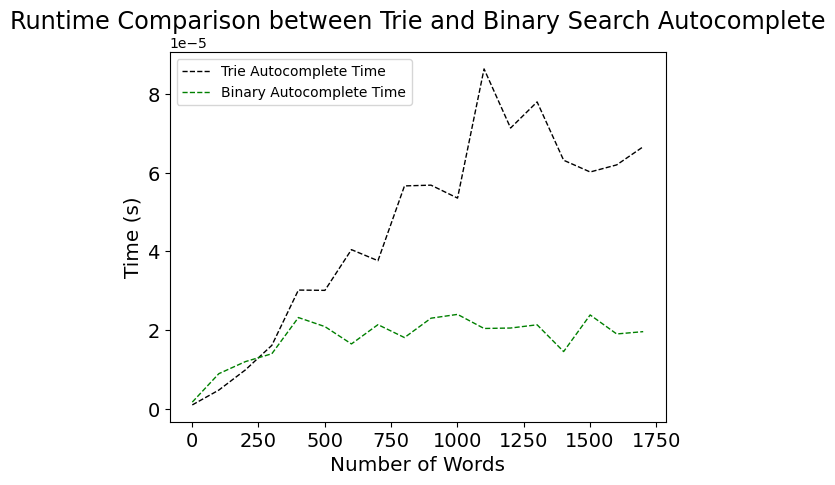

In [29]:
search_benchmark_scaled()

## Conclusions

Which was faster? How did Benchmark 2 compare with Benchmark 1?

A second benchmarking function was used to time the execution of [binary_search_autocomplete](#binary_search_autocomplete) and [trie_autocomplete](#trie_autocomplete) on a larger corpus of words. Each function was called on a set of 1750 words using the same six prefixes as the first benchmark. The results of the second benchmark showed that the Binary Search implementation had an average runtime of 4.85e-05, while the Trie based implementation had an average runtime of 1.48e-04. In contrast to the first benchmark, the binary_search_autocomplete algorithm outperformed the Trie based algorithm in the second benchmark. 

This is contrary to my assumption that the Binary Search algorithm would perform worse, since it is dependent on the number of words in the dictionary, as opposed to the trie based autocomplete, whose runtime is dependent on the size of the prefix, which was constant between the two experiments. One explanation for this discrepancy, is that the overhead of recursive function calls in the trie_autocomplete implementation contribute to the longer runtime.